In [6]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5f1f0ef3b81c0769a7570cf88c33e05d5478a1f331b48e70127bde8b0196b793
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


Recommended V intake: 13.33


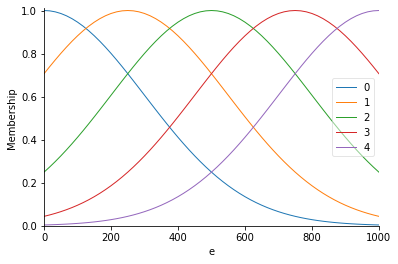

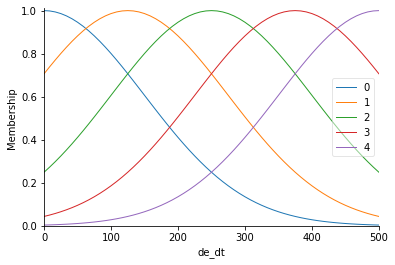

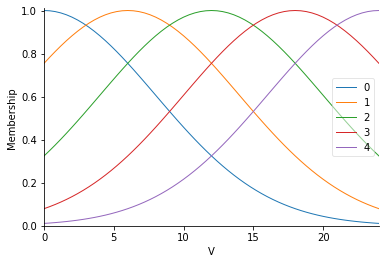

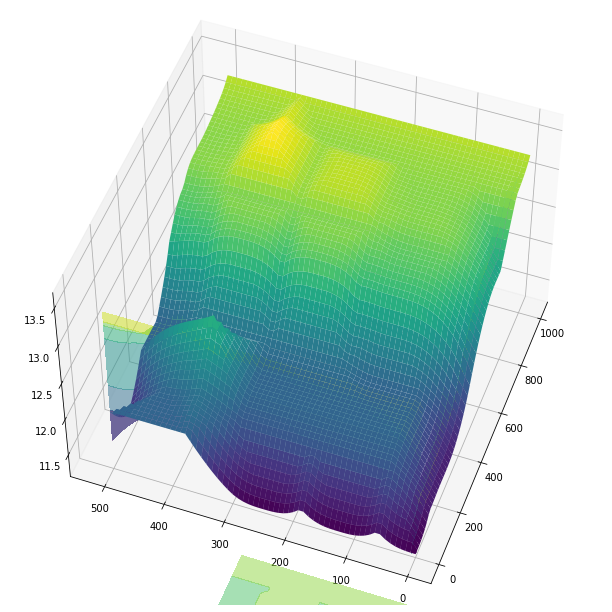

In [8]:
#EXERCISE 3: Fuzzy logic control of DC servo system
import numpy as np
import skfuzzy as fuzzy
import matplotlib
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import ControlSystemSimulation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend import time

#Create Universe with 3 variables e, de_dt, and V
universe = np.linspace(0,1000,61) 
universe1 = np.linspace(0,500,61)
universe2 = np.linspace(0,24,61)

#Initialize Antecedent and Consequent
e = ctrl.Antecedent(universe, 'e')
de_dt = ctrl.Antecedent(universe1, 'de_dt')
V = ctrl.Consequent(universe2, 'V')
     
#Set up MFs
e['0'] = fuzzy.gaussmf(e.universe,0,300)
e['1'] = fuzzy.gaussmf(e.universe,250,300)
e['2'] = fuzzy.gaussmf(e.universe,500,300)
e['3'] = fuzzy.gaussmf(e.universe,750,300)
e['4'] = fuzzy.gaussmf(e.universe,1000,300)

de_dt['0'] = fuzzy.gaussmf(de_dt.universe,0,150)
de_dt['1'] = fuzzy.gaussmf(de_dt.universe,125,150)
de_dt['2'] = fuzzy.gaussmf(de_dt.universe,250,150)
de_dt['3'] = fuzzy.gaussmf(de_dt.universe,375,150)
de_dt['4'] = fuzzy.gaussmf(de_dt.universe,500,150)

V['0'] = fuzzy.gaussmf(V.universe,0,8)
V['1'] = fuzzy.gaussmf(V.universe,6,8)
V['2'] = fuzzy.gaussmf(V.universe,12,8)
V['3'] = fuzzy.gaussmf(V.universe,18,8)
V['4'] = fuzzy.gaussmf(V.universe,24,8)
     
#Display MFs
e.view()
de_dt.view()
V.view()

#Set Rule
rules = [ ctrl.Rule(antecedent=(e['0']&(de_dt['0']|de_dt['1']|de_dt['2']|e['1']|e['2'])), consequent=V['0']),

          ctrl.Rule(antecedent=(e['0']|e['1'])&(de_dt['0']|de_dt['1']|de_dt['2']|e['3']|e['2']), consequent=V['1']),

          ctrl.Rule(antecedent=(e['0']|e['1']|e['3'])&(de_dt['0']|de_dt['1']|de_dt['2']|de_dt['4']|e['2']), consequent=V['2']),

          ctrl.Rule(antecedent=(e['1']|e['2']|e['3'])&(de_dt['1']|de_dt['2']|de_dt['3']|e['4']), consequent=V['3']),

          ctrl.Rule(antecedent=(e['2']|e['3']|e['4'])&(de_dt['2']|de_dt['3']|de_dt['4']|e['4']), consequent=V['4'])]

# Create control system and simulate
System = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(System, flush_after_run=61*61+1)

x, y = np.meshgrid(np.linspace(0, 1000, 61), np.linspace(0, 500, 61))
z = np.zeros_like(x)

for i, j in np.ndindex(x.shape): 
    # Assign input values to antecedents
    sim.input['e'] = x[i, j]
    sim.input['de_dt'] = y[i, j]
    # Make sure all antecedents have input values before computing     
    sim.compute()
    z[i, j] = sim.output['V']
print("Recommended V intake:", round(sim.output['V'], 2))

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                      linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset=6, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=6, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=6, cmap='viridis', alpha=0.5)
ax.view_init(50, 200)
